In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from skopt.space import Integer, Real, Categorical
from skopt import BayesSearchCV
from scipy.stats import uniform, loguniform

In [2]:
df = pd.read_csv('data/engineered_cmv&unpop_data')

In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

***Exploratory Data Analysis***

In [4]:
non_numerics = df.select_dtypes(exclude = np.number).columns.tolist()

In [5]:
excluded_ints = ['num_comments', 'post_score', 'training_set', 'post_subreddit']

In [6]:
ordered_sums = df.select_dtypes(include = np.dtype('int64')).drop(columns = excluded_ints).sum(numeric_only = True).sort_values(ascending = False).index

In [7]:
reindexer = []
reindexer.extend(non_numerics)
reindexer.extend(['neg_sentiment', 'pos_sentiment', 'neu_sentiment', 'comp_sentiment'])
reindexer.extend(excluded_ints)
reindexer.extend(ordered_sums)

In [8]:
df = df.reindex(reindexer, axis=1)

- Additional cleaning after engineering.

In [9]:
means = df.mean(axis=0)

In [10]:
odd_ones = {key: val for key, val in means.to_dict().items() if val > 1}

- Nothing out of the ordinary here.

In [11]:
odd_ones

{'num_comments': 44.36959505833905,
 'post_score': 27.254547014413177,
 'people': 1.5004289636238848,
 'like': 1.0217913520933424}

- Drop additional stopwords that were not covered by CountVectorizer.

In [12]:
mentions = df[df.columns.tolist()].sum()

In [13]:
list(mentions.keys())[10:35]

['people',
 'like',
 'just',
 'don',
 'wa',
 'think',
 'ha',
 'http',
 'thing',
 'make',
 'time',
 'want',
 'way',
 'feel',
 'woman',
 'say',
 'know',
 'life',
 'view',
 'good',
 'change',
 'cmv',
 'really',
 'right',
 'believe']

In [14]:
df.drop(columns = ['http', 'cmv', 've', 'ha', 'wa'], inplace = True) 

- Most frequently used words, least frequently used words.

In [15]:
mentions = df[df.columns.tolist()].sum()

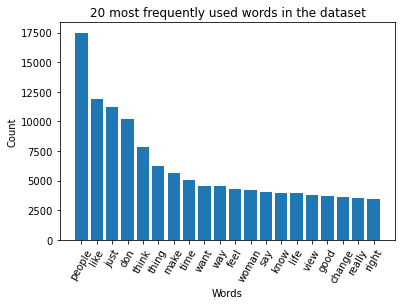

In [16]:
keys = list(mentions.to_dict().keys())
values = list(mentions.to_dict().values())

plt.bar(keys[10:30], values[10:30])
plt.xticks(rotation = 60)
plt.title("20 most frequently used words in the dataset")
plt.ylabel("Count")
plt.xlabel("Words")
plt.show()

- Many posts appear to talk about (perhaps unsurprisingly) opinions, given the frequency of people, like, don't, say, feel, know, and think.

In [17]:
to_pair = excluded_ints

In [18]:
to_pair.remove('training_set')

In [21]:
to_pair.remove('post_subreddit')

In [19]:
to_pair.extend(['neg_sentiment', 'pos_sentiment', 'neu_sentiment', 'comp_sentiment'])

- Outlier and distributions check.

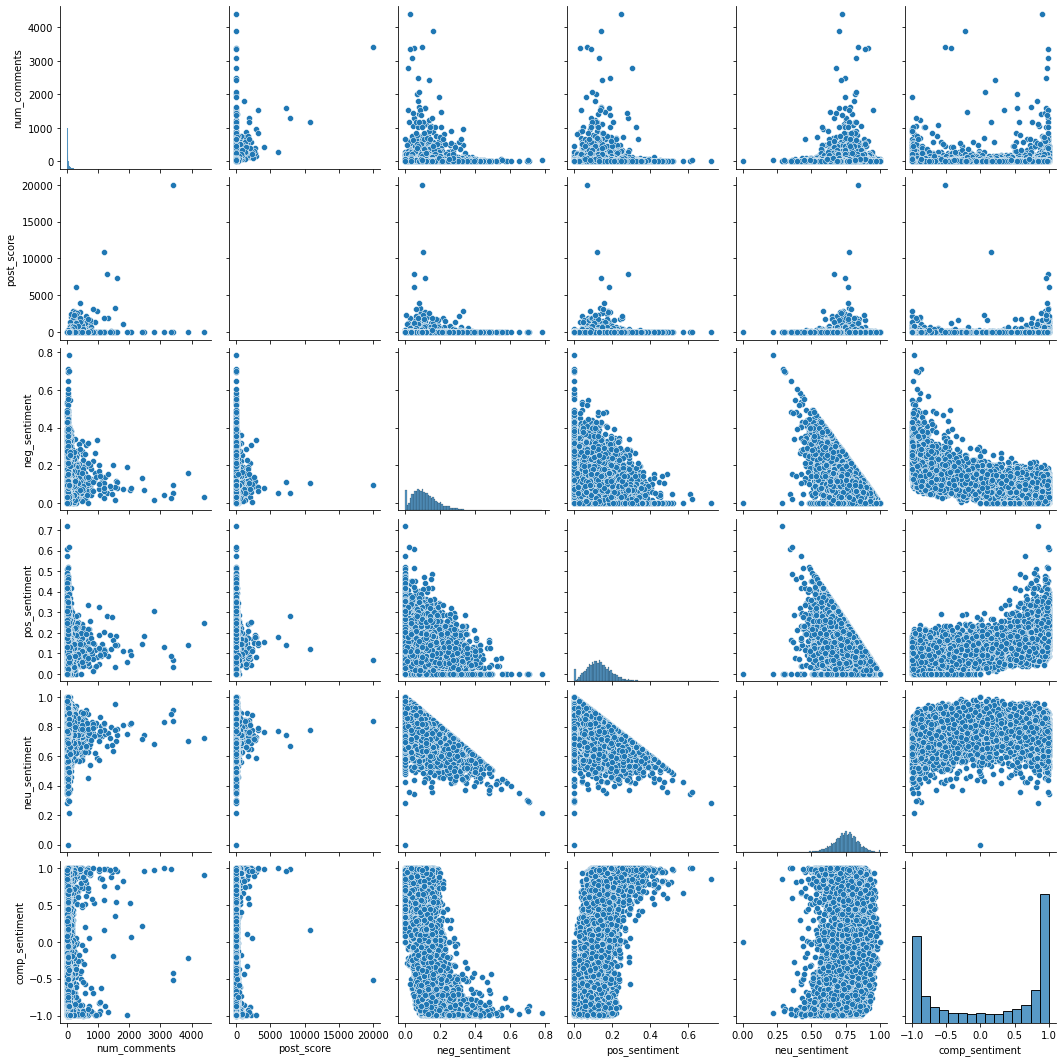

In [22]:
sns.pairplot(df, vars = excluded_ints)
plt.show()

- No need to remove these outliers, as post_score and num_counts both just indicate additional text data that will not be used in this analysis.
- Posts in these subreddits that receive upvotes or comments appear to be clustered around low negative and positive sentiments and high neutral sentiment.